In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [4]:
#len(xtrain)=6000
#len(ytrain)=6000
#len(xtest)=1000
#len(ytest)=1000

In [5]:
xtrain[10]
#shows 9th data 
#xtrain[10:20] for 10 to 20 all 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(*args, **kw)>

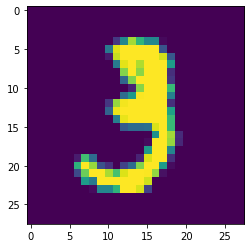

In [6]:
plt.imshow(xtrain[10]) #imshow is image show
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

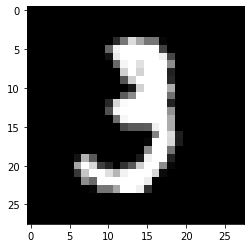

In [7]:
#for color to change to grey
plt.imshow(xtrain[10],cmap='gray') #imshow is image show
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

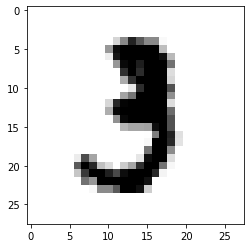

In [8]:
plt.imshow(xtrain[10],cmap=plt.cm.binary) #imshow is image show
plt.show


In [9]:
ytrain[10] #answer for the x img id =y 

3

In [10]:
#we normalize/scal the data to improve accuracy i.e. range ko 0-1 bana do
xtrain=tf.keras.utils.normalize(xtrain)
xtest=tf.keras.utils.normalize(xtest)

In [11]:
xtrain[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
##Build model
model=tf.keras.models.Sequential()

In [13]:
xtrain.shape

(60000, 28, 28)

In [14]:
ytrain.shape

(60000,)

In [15]:
model.add(tf.keras.layers.Flatten())  #input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))  #hidden layer
model.add(tf.keras.layers.Dense(600,activation='relu'))  #hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))  #hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))  #output layer has 10 cz output is in 9 dimentions 
#put any random numbers inplace of784 but should help yield ans keep changing them if required

#shape is 28*28=784

In [19]:
#Compile (configure) model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
##Training the model
model.fit(xtrain,ytrain,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1988 - accuracy: 0.9380
Epoch 2/3
60000/60000 [==============================] - 16s 260us/sample - loss: 0.0904 - accuracy: 0.9720
Epoch 3/3
60000/60000 [==============================] - 19s 319us/sample - loss: 0.0629 - accuracy: 0.9801


In [21]:
predictions=model.predict(xtest)

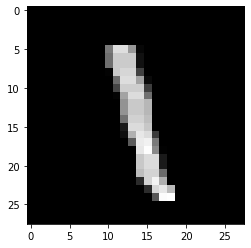

In [26]:
plt.imshow(xtest[700],cmap='gray')
plt.show()

In [27]:
np.argmax(predictions[700])

1

In [31]:
val_loss,val_acc=model.evaluate(xtest,ytest)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0815 - accuracy: 0.9774
0.08147528594471515
0.9774
